In [1]:
import matplotlib.pyplot as plt
import galsim
from lsstetc import ETC

In [26]:
band = "i"
pixel_scale = 0.2 # arcsec
stamp_size = 31 # pixels
threshold = 0.0
nvisits = 50
visit_time = 15

flux = 1e5
gal = galsim.Gaussian(flux=flux, sigma=1) # sigma = 2 arcsec
#gal = galsim.Sersic(n=5, half_light_radius=0.2)
psf = galsim.Gaussian(fwhm=0.67) # Full-width half-max of the PSF in arcseconds

profile = galsim.Convolve([gal, psf])

etc = ETC(band, profile=profile, pixel_scale=pixel_scale, stamp_size=stamp_size,
              threshold=threshold, nvisits=nvisits, visit_time=visit_time)

In [27]:
img = galsim.ImageD(etc.stamp_size, etc.stamp_size, scale=etc.pixel_scale)
profile = profile.withFlux(flux)
profile.drawImage(image=img)
gd = galsim.GaussianNoise(galsim.BaseDeviate(1), sigma=etc.sigma_sky)
img.addNoise(gd)

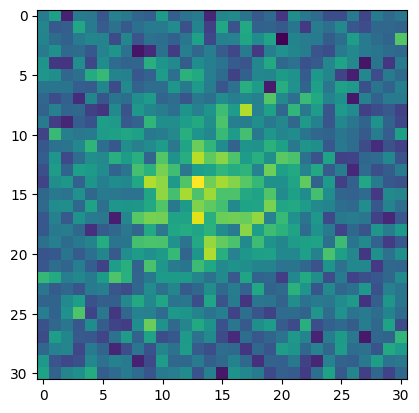

In [28]:
plt.imshow(img.array)
plt.show()